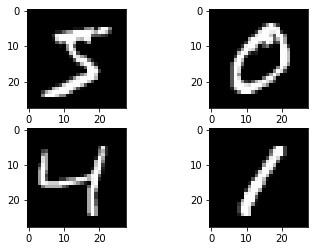

In [0]:
# https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/
#plot ad hoc mnist instances
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
import matplotlib.pyplot as plt
# load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [0]:
#MULTI-LAYER PERCEPTRONS
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0], num_pixels)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], num_pixels)).astype('float32')
# normalize inputs form 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
#one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [0]:
#MULTI-LAYER PERCEPTRONS
#define baseline model
def baseline_model():
  # create model
  model = Sequential()
  model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
  model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
  # compile model
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [0]:
#MULTI-LAYER PERCEPTRONS
#build the model
model = baseline_model()
#fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
#final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 6s - loss: 0.2754 - accuracy: 0.9232 - val_loss: 0.1415 - val_accuracy: 0.9580
Epoch 2/10
 - 5s - loss: 0.1102 - accuracy: 0.9679 - val_loss: 0.1113 - val_accuracy: 0.9656
Epoch 3/10
 - 5s - loss: 0.0723 - accuracy: 0.9787 - val_loss: 0.0747 - val_accuracy: 0.9767
Epoch 4/10
 - 5s - loss: 0.0491 - accuracy: 0.9860 - val_loss: 0.0656 - val_accuracy: 0.9792
Epoch 5/10
 - 5s - loss: 0.0353 - accuracy: 0.9905 - val_loss: 0.0698 - val_accuracy: 0.9777
Epoch 6/10
 - 5s - loss: 0.0265 - accuracy: 0.9924 - val_loss: 0.0601 - val_accuracy: 0.9815
Epoch 7/10
 - 5s - loss: 0.0195 - accuracy: 0.9949 - val_loss: 0.0581 - val_accuracy: 0.9812
Epoch 8/10
 - 5s - loss: 0.0138 - accuracy: 0.9968 - val_loss: 0.0568 - val_accuracy: 0.9816
Epoch 9/10
 - 5s - loss: 0.0103 - accuracy: 0.9979 - val_loss: 0.0581 - val_accuracy: 0.9813
Epoch 10/10
 - 5s - loss: 0.0073 - accuracy: 0.9988 - val_loss: 0.0590 - val_accuracy: 0.9813
Baseline Error: 1.8

In [0]:
#CNN imports
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils


In [0]:
#CNN MODEL
#load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
#reshape to be [samples][width][height][channels]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
# normalize inputs form 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
#one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [0]:
#CNN MODEL
def cnn_baseline_model():
  #create model
  model = Sequential()
  model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(num_classes, activation='softmax'))
  #compile model
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model
#build the model
model = cnn_baseline_model()
#fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
#final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 29s - loss: 0.2527 - accuracy: 0.9270 - val_loss: 0.0767 - val_accuracy: 0.9769
Epoch 2/10
 - 29s - loss: 0.0738 - accuracy: 0.9776 - val_loss: 0.0486 - val_accuracy: 0.9843
Epoch 3/10
 - 28s - loss: 0.0520 - accuracy: 0.9839 - val_loss: 0.0406 - val_accuracy: 0.9863
Epoch 4/10
 - 28s - loss: 0.0418 - accuracy: 0.9875 - val_loss: 0.0375 - val_accuracy: 0.9886
Epoch 5/10
 - 28s - loss: 0.0340 - accuracy: 0.9892 - val_loss: 0.0383 - val_accuracy: 0.9874
Epoch 6/10
 - 28s - loss: 0.0281 - accuracy: 0.9906 - val_loss: 0.0331 - val_accuracy: 0.9886
Epoch 7/10
 - 29s - loss: 0.0235 - accuracy: 0.9927 - val_loss: 0.0341 - val_accuracy: 0.9893
Epoch 8/10
 - 28s - loss: 0.0203 - accuracy: 0.9934 - val_loss: 0.0298 - val_accuracy: 0.9902
Epoch 9/10
 - 28s - loss: 0.0164 - accuracy: 0.9946 - val_loss: 0.0307 - val_accuracy: 0.9894
Epoch 10/10
 - 28s - loss: 0.0142 - accuracy: 0.9954 - val_loss: 0.0319 - val_accuracy: 0.9891
CNN Error

In [0]:
#LARGER CNN MODEL
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
#load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
#reshape to be [sample][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')
#normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
#one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [0]:
#define the larget model
def cnn_larger_model():
  #create model
  model = Sequential()
  model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(15, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(50, activation='relu'))
  model.add(Dense(num_classes, activation='softmax'))
  #Compile model
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model
#build the model
model = cnn_larger_model()
#fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
#final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Large CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 36s 592us/step - loss: 0.3686 - accuracy: 0.8869 - val_loss: 0.0844 - val_accuracy: 0.9732
Epoch 2/10
60000/60000 [==============================] - 35s 588us/step - loss: 0.0938 - accuracy: 0.9712 - val_loss: 0.0503 - val_accuracy: 0.9839
Epoch 3/10
60000/60000 [==============================] - 35s 589us/step - loss: 0.0674 - accuracy: 0.9790 - val_loss: 0.0385 - val_accuracy: 0.9873
Epoch 4/10
60000/60000 [==============================] - 41s 678us/step - loss: 0.0556 - accuracy: 0.9827 - val_loss: 0.0314 - val_accuracy: 0.9896
Epoch 5/10
60000/60000 [==============================] - 35s 590us/step - loss: 0.0476 - accuracy: 0.9847 - val_loss: 0.0301 - val_accuracy: 0.9894
Epoch 6/10
60000/60000 [==============================] - 35s 587us/step - loss: 0.0424 - accuracy: 0.9862 - val_loss: 0.0269 - val_accuracy: 0.9905
Epoch 7/10
60000/60000 [==============================] 

In [0]:
#serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
  json_file.write(model_json)
#serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [0]:
#load json and create model
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
#load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [0]:
#evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(X_test, y_test, verbose=0)
print("Large CNN Error: %.2f%%" % (100-scores[1]*100))

Large CNN Error: 0.92%


In [0]:
import numpy as np
Xsingle = X_train[0]
ynew = loaded_model.predict(np.array([Xsingle,]))
print("X = 5, Predicted = %s" % (ynew))


X = 5, Predicted = [[2.4034082e-12 1.3272629e-06 3.7893480e-10 8.1908684e-03 3.8938462e-12
  9.9180341e-01 1.5241660e-08 4.4018895e-09 5.1084140e-07 3.9032270e-06]]
